In [56]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
df = pd.read_csv("../data/data_latinoamerica.csv")

In [58]:
df = df[df['location_key'] == 'CL']

In [59]:
df

,location_key,date,country_code,country_name,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,...,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,new_recovered,cumulative_recovered
6115461,CL,2020-01-01,CL,Chile,0.00,0.00,0.00,0.00,NaN,17574003.00,...,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40,NaN,NaN
6115462,CL,2020-01-02,CL,Chile,0.00,0.00,0.00,0.00,NaN,17574003.00,...,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40,NaN,NaN
6115463,CL,2020-01-03,CL,Chile,0.00,0.00,0.00,0.00,NaN,17574003.00,...,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40,NaN,NaN
6115464,CL,2020-01-04,CL,Chile,0.00,0.00,0.00,0.00,NaN,17574003.00,...,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40,NaN,NaN
6115465,CL,2020-01-05,CL,Chile,0.00,0.00,0.00,0.00,NaN,17574003.00,...,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6116447,CL,2022-09-13,CL,Chile,1906.00,10.00,4568495.00,60822.00,62204235.00,17574003.00,...,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40,0.00,NaN
6116448,CL,2022-09-14,CL,Chile,NaN,NaN,NaN,NaN,NaN,17574003.00,...,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40,NaN,NaN
6116449,CL,2022-09-15,CL,Chile,NaN,NaN,NaN,NaN,NaN,17574003.00,...,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40,NaN,NaN
6116450,CL,2022-09-16,CL,Chile,NaN,NaN,NaN,NaN,NaN,17574003.00,...,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40,NaN,NaN


### Contar cuantos valores Nulos tiene cada columna

In [60]:
# Contar cuántas filas contienen valores nulos en cada columna
null_counts = df.isnull().sum()

# Filtrar solo las columnas que tienen valores nulos
columns_with_nulls = null_counts[null_counts > 0]

# Mostrar el recuento de filas con valores nulos por columna
print("Columns with null values and their counts:")
print(columns_with_nulls)

Columns with null values and their counts:
new_confirmed                              4
new_deceased                               4
cumulative_confirmed                       4
cumulative_deceased                        4
cumulative_vaccine_doses_administered    376
average_temperature_celsius                6
minimum_temperature_celsius                6
maximum_temperature_celsius                6
rainfall_mm                                6
relative_humidity                          6
new_recovered                             66
cumulative_recovered                     899
dtype: int64


### Contar cuantos 0 tiene cada columna

In [61]:
# Contar cuántas filas contienen valores 0 en cada columna
columns_with_zeros = df.columns[(df == 0).any()]

# Crear un diccionario para almacenar el recuento de filas con valores 0
zero_counts = {column: (df[column] == 0).sum() for column in columns_with_zeros}

# Mostrar el recuento de filas con valores 0 por columna
print("\nColumns with zero values and their counts:")
for column, count in zero_counts.items():
    print(f"Column '{column}' has {count} rows with zero values.")

# Opcional: mostrar el diccionario completo de ceros
print("\nCounts of zero values per column:", zero_counts)


Columns with zero values and their counts:
Column 'new_confirmed' has 61 rows with zero values.
Column 'new_deceased' has 87 rows with zero values.
Column 'cumulative_confirmed' has 57 rows with zero values.
Column 'cumulative_deceased' has 81 rows with zero values.
Column 'rainfall_mm' has 678 rows with zero values.
Column 'new_recovered' has 848 rows with zero values.
Column 'cumulative_recovered' has 15 rows with zero values.

Counts of zero values per column: {'new_confirmed': 61, 'new_deceased': 87, 'cumulative_confirmed': 57, 'cumulative_deceased': 81, 'rainfall_mm': 678, 'new_recovered': 848, 'cumulative_recovered': 15}


# Transformacion de DF

#### Realizo un filtrado debido que anterior y posterior a estas fechas hay valores nulos y/o datos errones

In [62]:
# Definir el rango de fechas
start_date = '2020-01-01'
end_date = '2022-08-31'

# Filtrar el DataFrame para mantener las filas dentro del rango de fechas
df_cl = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

#### Elimino estas columnas por: 
#### las 2 primeras columnas tienen valores errones
#### la 3ra columna tiene muchos valores en 0
#### la 4 y 5ta columna tienen puros valores nulos
#### la 6 y 7ma columna no concuerdan con el de poblacion 
#### Prefiero trabajar con el promedio de la temperatura del dia

In [63]:
columns_to_drop = [
    'cumulative_confirmed', 
    'cumulative_deceased', 
    'rainfall_mm', 
    'new_recovered',
    'cumulative_recovered',
    'population_rural',
    'population_urban', 
    'minimum_temperature_celsius', 
    'maximum_temperature_celsius'
]

# Eliminar las columnas
df_cl = df_cl.copy()
df_cl.drop(columns=columns_to_drop, inplace=True)


In [64]:
df_cl.head()

,location_key,date,country_code,country_name,new_confirmed,new_deceased,cumulative_vaccine_doses_administered,population,population_male,population_female,...,average_temperature_celsius,relative_humidity,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate
6115461,CL,2020-01-01,CL,Chile,0.00,0.00,NaN,17574003.00,8972014.00,8601989.00,...,20.80,57.37,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40
6115462,CL,2020-01-02,CL,Chile,0.00,0.00,NaN,17574003.00,8972014.00,8601989.00,...,19.89,62.00,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40
6115463,CL,2020-01-03,CL,Chile,0.00,0.00,NaN,17574003.00,8972014.00,8601989.00,...,20.14,65.80,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40
6115464,CL,2020-01-04,CL,Chile,0.00,0.00,NaN,17574003.00,8972014.00,8601989.00,...,21.08,65.11,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40
6115465,CL,2020-01-05,CL,Chile,0.00,0.00,NaN,17574003.00,8972014.00,8601989.00,...,19.46,64.95,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40


In [65]:
# Contar cuántas filas contienen valores nulos en cada columna
null_counts = df_cl.isnull().sum()

# Filtrar solo las columnas que tienen valores nulos
columns_with_nulls = null_counts[null_counts > 0]

# Mostrar el recuento de filas con valores nulos por columna
print("Columns with null values and their counts:")
print(columns_with_nulls)

Columns with null values and their counts:
cumulative_vaccine_doses_administered    372
average_temperature_celsius                2
relative_humidity                          2
dtype: int64


In [66]:
# Contar cuántas filas contienen valores 0 en cada columna
columns_with_zeros = df_cl.columns[(df_cl == 0).any()]

# Crear un diccionario para almacenar el recuento de filas con valores 0
zero_counts = {column: (df_cl[column] == 0).sum() for column in columns_with_zeros}

# Mostrar el recuento de filas con valores 0 por columna
print("\nColumns with zero values and their counts:")
for column, count in zero_counts.items():
    print(f"Column '{column}' has {count} rows with zero values.")

# Opcional: mostrar el diccionario completo de ceros
print("\nCounts of zero values per column:", zero_counts)


Columns with zero values and their counts:
Column 'new_confirmed' has 61 rows with zero values.
Column 'new_deceased' has 87 rows with zero values.

Counts of zero values per column: {'new_confirmed': 61, 'new_deceased': 87}


#### Vamos a imputar las columnas que tienen valores nulos y ceros 

In [67]:
# Imputación con la media para columnas específicas
df_cl.loc[:, 'average_temperature_celsius'] = df_cl['average_temperature_celsius'].fillna(df_cl['average_temperature_celsius'].mean())
df_cl.loc[:, 'relative_humidity'] = df_cl['relative_humidity'].fillna(df_cl['relative_humidity'].mean())

In [68]:
# Rellenar con 0 donde la fecha sea menor a '2021-02-17'
fecha_limite = '2020-12-29'
df_cl.loc[df['date'] < fecha_limite] = df_cl.loc[df['date'] < fecha_limite].fillna(0)

In [69]:
# Contar cuántas filas contienen valores 0 en cada columna
columns_with_zeros = df.columns[(df == 0).any()]

# Crear un diccionario para almacenar el recuento de filas con valores 0
zero_counts = {column: (df[column] == 0).sum() for column in columns_with_zeros}

# Mostrar el recuento de filas con valores 0 por columna
print("\nColumns with zero values and their counts:")
for column, count in zero_counts.items():
    print(f"Column '{column}' has {count} rows with zero values.")

# Opcional: mostrar el diccionario completo de ceros
print("\nCounts of zero values per column:", zero_counts)


Columns with zero values and their counts:
Column 'new_confirmed' has 61 rows with zero values.
Column 'new_deceased' has 87 rows with zero values.
Column 'cumulative_confirmed' has 57 rows with zero values.
Column 'cumulative_deceased' has 81 rows with zero values.
Column 'rainfall_mm' has 678 rows with zero values.
Column 'new_recovered' has 848 rows with zero values.
Column 'cumulative_recovered' has 15 rows with zero values.

Counts of zero values per column: {'new_confirmed': 61, 'new_deceased': 87, 'cumulative_confirmed': 57, 'cumulative_deceased': 81, 'rainfall_mm': 678, 'new_recovered': 848, 'cumulative_recovered': 15}


In [70]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_cl.describe()

,new_confirmed,new_deceased,cumulative_vaccine_doses_administered,population,population_male,population_female,population_density,human_development_index,population_age_00_09,population_age_10_19,...,average_temperature_celsius,relative_humidity,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate
count,974.00,974.00,961.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00,...,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00
mean,4426.58,62.06,21853699.34,17574003.00,8972014.00,8601989.00,25.71,0.83,2428079.00,2493879.00,...,15.37,62.67,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40
std,5930.18,370.52,22632949.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,4.95,9.30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
min,0.00,0.00,0.00,17574003.00,8972014.00,8601989.00,25.71,0.83,2428079.00,2493879.00,...,4.09,33.53,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40
25%,1227.25,11.00,0.00,17574003.00,8972014.00,8601989.00,25.71,0.83,2428079.00,2493879.00,...,11.13,55.39,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40
50%,2369.00,32.00,15773547.00,17574003.00,8972014.00,8601989.00,25.71,0.83,2428079.00,2493879.00,...,15.34,62.80,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40
75%,5515.00,71.00,44495954.00,17574003.00,8972014.00,8601989.00,25.71,0.83,2428079.00,2493879.00,...,19.78,69.19,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40
max,38446.00,11447.00,61953990.00,17574003.00,8972014.00,8601989.00,25.71,0.83,2428079.00,2493879.00,...,26.17,89.07,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40


In [71]:
#calcular columna vacunas administradas por dia
g=df_cl.cumulative_vaccine_doses_administered.tolist()
h=[0.0]
for i in range(1,len(g)):
    h.append(g[i]-g[i-1])
df_cl['vaccine_doses_administered_for_day']=h

df_cl.vaccine_doses_administered_for_day.max()

430493.0

In [72]:
df_cl.drop(columns='cumulative_vaccine_doses_administered', inplace=True)

In [73]:
# Crear la columna del acumulado de vacunas diarias
df_cl['cumulative_vaccine_doses_administered'] = df_cl['vaccine_doses_administered_for_day'].cumsum()

col = list(df_cl.columns)
col.remove('cumulative_vaccine_doses_administered')
col.insert(7, 'cumulative_vaccine_doses_administered')
df_cl = df_cl[col]
df_cl

,location_key,date,country_code,country_name,new_confirmed,new_deceased,population,cumulative_vaccine_doses_administered,population_male,population_female,...,relative_humidity,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,vaccine_doses_administered_for_day
6115461,CL,2020-01-01,CL,Chile,0.00,0.00,17574003.00,0.00,8972014.00,8601989.00,...,57.37,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40,0.00
6115462,CL,2020-01-02,CL,Chile,0.00,0.00,17574003.00,0.00,8972014.00,8601989.00,...,62.00,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40,0.00
6115463,CL,2020-01-03,CL,Chile,0.00,0.00,17574003.00,0.00,8972014.00,8601989.00,...,65.80,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40,0.00
6115464,CL,2020-01-04,CL,Chile,0.00,0.00,17574003.00,0.00,8972014.00,8601989.00,...,65.11,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40,0.00
6115465,CL,2020-01-05,CL,Chile,0.00,0.00,17574003.00,0.00,8972014.00,8601989.00,...,64.95,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6116430,CL,2022-08-27,CL,Chile,7455.00,29.00,17574003.00,61836654.00,8972014.00,8601989.00,...,56.20,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40,9156.00
6116431,CL,2022-08-28,CL,Chile,6657.00,30.00,17574003.00,61837598.00,8972014.00,8601989.00,...,43.79,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40,944.00
6116432,CL,2022-08-29,CL,Chile,4659.00,23.00,17574003.00,61870447.00,8972014.00,8601989.00,...,55.35,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40,32849.00
6116433,CL,2022-08-30,CL,Chile,3348.00,10.00,17574003.00,61902121.00,8972014.00,8601989.00,...,63.18,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40,31674.00


In [74]:
col = list(df_cl.columns)
col.remove('vaccine_doses_administered_for_day')
col.insert(6, 'vaccine_doses_administered_for_day')
df_cl = df_cl[col]
df_cl

,location_key,date,country_code,country_name,new_confirmed,new_deceased,vaccine_doses_administered_for_day,population,cumulative_vaccine_doses_administered,population_male,...,average_temperature_celsius,relative_humidity,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate
6115461,CL,2020-01-01,CL,Chile,0.00,0.00,0.00,17574003.00,0.00,8972014.00,...,20.80,57.37,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40
6115462,CL,2020-01-02,CL,Chile,0.00,0.00,0.00,17574003.00,0.00,8972014.00,...,19.89,62.00,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40
6115463,CL,2020-01-03,CL,Chile,0.00,0.00,0.00,17574003.00,0.00,8972014.00,...,20.14,65.80,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40
6115464,CL,2020-01-04,CL,Chile,0.00,0.00,0.00,17574003.00,0.00,8972014.00,...,21.08,65.11,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40
6115465,CL,2020-01-05,CL,Chile,0.00,0.00,0.00,17574003.00,0.00,8972014.00,...,19.46,64.95,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6116430,CL,2022-08-27,CL,Chile,7455.00,29.00,9156.00,17574003.00,61836654.00,8972014.00,...,12.85,56.20,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40
6116431,CL,2022-08-28,CL,Chile,6657.00,30.00,944.00,17574003.00,61837598.00,8972014.00,...,12.08,43.79,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40
6116432,CL,2022-08-29,CL,Chile,4659.00,23.00,32849.00,17574003.00,61870447.00,8972014.00,...,11.44,55.35,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40
6116433,CL,2022-08-30,CL,Chile,3348.00,10.00,31674.00,17574003.00,61902121.00,8972014.00,...,11.38,63.18,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40


In [75]:
df_cl.describe()

,new_confirmed,new_deceased,vaccine_doses_administered_for_day,population,cumulative_vaccine_doses_administered,population_male,population_female,population_density,human_development_index,population_age_00_09,...,average_temperature_celsius,relative_humidity,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate
count,974.00,974.00,954.00,974.00,954.00,974.00,974.00,974.00,974.00,974.00,...,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00
mean,4426.58,62.06,64917.64,17574003.00,21999941.64,8972014.00,8601989.00,25.71,0.83,2428079.00,...,15.37,62.67,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40
std,5930.18,370.52,87866.45,0.00,22629778.07,0.00,0.00,0.00,0.00,0.00,...,4.95,9.30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
min,0.00,0.00,-8648.00,17574003.00,0.00,8972014.00,8601989.00,25.71,0.83,2428079.00,...,4.09,33.53,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40
25%,1227.25,11.00,0.00,17574003.00,0.00,8972014.00,8601989.00,25.71,0.83,2428079.00,...,11.13,55.39,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40
50%,2369.00,32.00,5865.50,17574003.00,16211028.50,8972014.00,8601989.00,25.71,0.83,2428079.00,...,15.34,62.80,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40
75%,5515.00,71.00,125030.25,17574003.00,44752642.50,8972014.00,8601989.00,25.71,0.83,2428079.00,...,19.78,69.19,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40
max,38446.00,11447.00,430493.00,17574003.00,61931427.00,8972014.00,8601989.00,25.71,0.83,2428079.00,...,26.17,89.07,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40


In [76]:
# Calcular media y desvio estandar
media = df_cl['vaccine_doses_administered_for_day'].mean()
desvio_estandar = df_cl['vaccine_doses_administered_for_day'].std()

# Definir los límites para considerar outliers
lower_bound = media - 3 * desvio_estandar
upper_bound = media + 3 * desvio_estandar

# Verificar si lower_bound es menor a 0
if lower_bound < 0:
    lower_bound = 0

# Filtrar el DataFrame para ver los outliers
df_cl[(df_cl['vaccine_doses_administered_for_day'] < lower_bound) | (df_cl['vaccine_doses_administered_for_day'] > upper_bound)]

,location_key,date,country_code,country_name,new_confirmed,new_deceased,vaccine_doses_administered_for_day,population,cumulative_vaccine_doses_administered,population_male,...,average_temperature_celsius,relative_humidity,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate
6115823,CL,2020-12-28,CL,Chile,1923.00,0.00,-8648.00,17574003.00,0.00,8972014.00,...,20.57,65.36,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40
6115893,CL,2021-03-08,CL,Chile,4733.00,86.00,350820.00,17574003.00,4972997.00,8972014.00,...,22.78,54.36,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40
6115894,CL,2021-03-09,CL,Chile,3528.00,19.00,376708.00,17574003.00,5349705.00,8972014.00,...,21.44,55.64,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40
6115895,CL,2021-03-10,CL,Chile,3958.00,24.00,401527.00,17574003.00,5751232.00,8972014.00,...,21.88,60.39,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40
6115896,CL,2021-03-11,CL,Chile,5566.00,156.00,417231.00,17574003.00,6168463.00,8972014.00,...,21.43,58.00,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40
6115897,CL,2021-03-12,CL,Chile,5983.00,89.00,374530.00,17574003.00,6542993.00,8972014.00,...,20.75,61.85,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40
6115900,CL,2021-03-15,CL,Chile,5117.00,98.00,430493.00,17574003.00,7030563.00,8972014.00,...,18.41,77.43,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40
6115901,CL,2021-03-16,CL,Chile,4591.00,17.00,410432.00,17574003.00,7440995.00,8972014.00,...,18.72,66.45,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40
6115902,CL,2021-03-17,CL,Chile,4395.00,27.00,367465.00,17574003.00,7808460.00,8972014.00,...,17.09,71.05,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40
6115903,CL,2021-03-18,CL,Chile,6249.00,172.00,335162.00,17574003.00,8143622.00,8972014.00,...,14.02,80.95,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40


In [77]:
# Filtrar el DataFrame para mantener solo los valores dentro de los límites
df_filtered= df_cl[(df_cl['vaccine_doses_administered_for_day'] >= lower_bound) & (df_cl['vaccine_doses_administered_for_day'] <= upper_bound)]

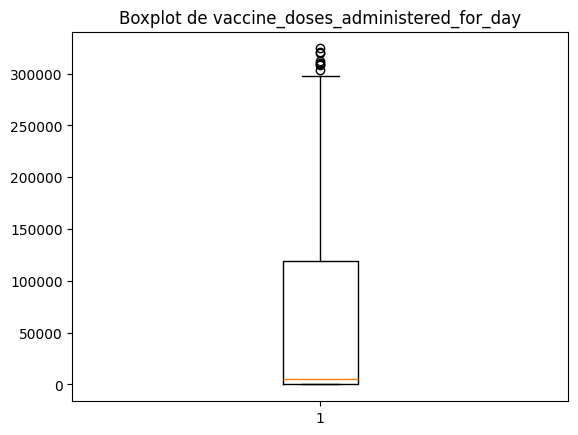

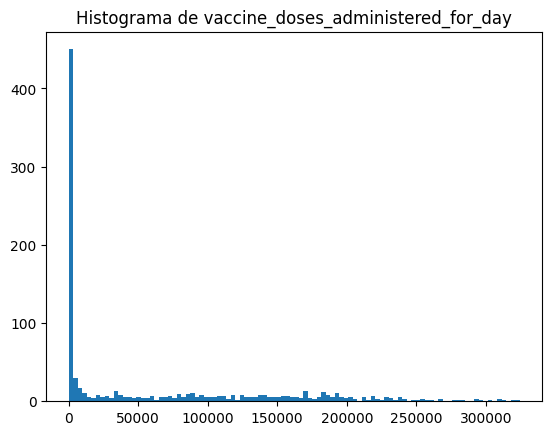

In [78]:
# Ajustar la escala del eje Y para mostrar números completos
plt.ticklabel_format(style='plain', axis='y')

# Boxplot con matplotlib
plt.boxplot(df_filtered['vaccine_doses_administered_for_day'])
plt.title('Boxplot de vaccine_doses_administered_for_day')
plt.show()

# Histograma con matplotlib
plt.hist(df_filtered['vaccine_doses_administered_for_day'], bins=100) # el número de bins se puede ajustar a preferencia 
plt.title('Histograma de vaccine_doses_administered_for_day')
plt.show()

In [79]:
avg_vaccine = round(df_cl['vaccine_doses_administered_for_day'].mean(), 0)

df_prueba = df_cl.copy()  # Crear una copia del DataFrame original

# Reemplazar los valores por encima del valor máximo o por debajo del valor mínimo con el promedio
df_prueba['vaccine_doses_administered_for_day'] = df_prueba['vaccine_doses_administered_for_day'].apply(
    lambda x: avg_vaccine if x > upper_bound or x < lower_bound else x
)

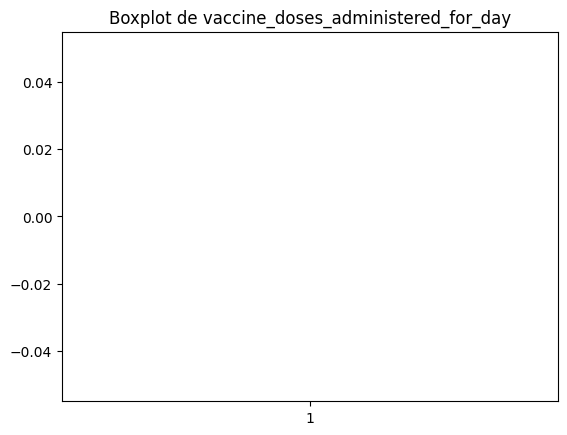

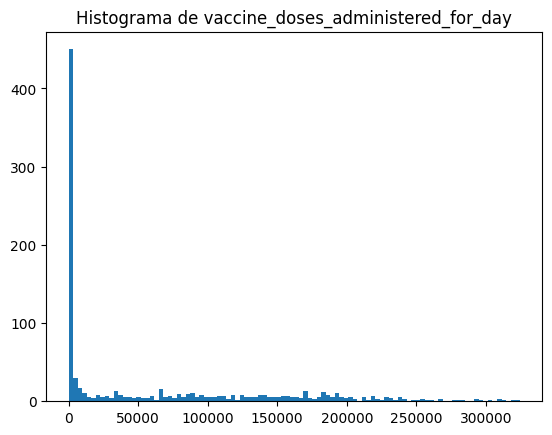

In [80]:
# Ajustar la escala del eje Y para mostrar números completos
plt.ticklabel_format(style='plain', axis='y')

# Boxplot con matplotlib
plt.boxplot(df_prueba['vaccine_doses_administered_for_day'])
plt.title('Boxplot de vaccine_doses_administered_for_day')
plt.show()

# Histograma con matplotlib
plt.hist(df_prueba['vaccine_doses_administered_for_day'], bins=100) # el número de bins se puede ajustar a preferencia 
plt.title('Histograma de vaccine_doses_administered_for_day')
plt.show()

In [81]:
df_prueba.to_csv('data\processed\covid19_Chile.csv', index=False)


In [82]:
df_prueba.describe()

,new_confirmed,new_deceased,vaccine_doses_administered_for_day,population,cumulative_vaccine_doses_administered,population_male,population_female,population_density,human_development_index,population_age_00_09,...,average_temperature_celsius,relative_humidity,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate
count,974.00,974.00,954.00,974.00,954.00,974.00,974.00,974.00,974.00,974.00,...,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00
mean,4426.58,62.06,61975.77,17574003.00,21999941.64,8972014.00,8601989.00,25.71,0.83,2428079.00,...,15.37,62.67,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40
std,5930.18,370.52,82039.48,0.00,22629778.07,0.00,0.00,0.00,0.00,0.00,...,4.95,9.30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
min,0.00,0.00,0.00,17574003.00,0.00,8972014.00,8601989.00,25.71,0.83,2428079.00,...,4.09,33.53,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40
25%,1227.25,11.00,0.00,17574003.00,0.00,8972014.00,8601989.00,25.71,0.83,2428079.00,...,11.13,55.39,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40
50%,2369.00,32.00,6084.00,17574003.00,16211028.50,8972014.00,8601989.00,25.71,0.83,2428079.00,...,15.34,62.80,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40
75%,5515.00,71.00,118981.00,17574003.00,44752642.50,8972014.00,8601989.00,25.71,0.83,2428079.00,...,19.78,69.19,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40
max,38446.00,11447.00,324254.00,17574003.00,61931427.00,8972014.00,8601989.00,25.71,0.83,2428079.00,...,26.17,89.07,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40
